## Lab: Application of Principal Component Analysis(PCA)

In [19]:
!pip install numpy==2.2.0
!pip install scikit-learn==1.6.0
!pip install matplotlib==3.9.3

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

## Create Dataset

In [3]:
#Create bivarate normal distribution dataset
np.random.seed(42)
mean = [0, 0]
cov = [[3, 2], [2, 2]] #covariance matrix
X = np.random.multivariate_normal(mean=mean, cov=cov, size=200)

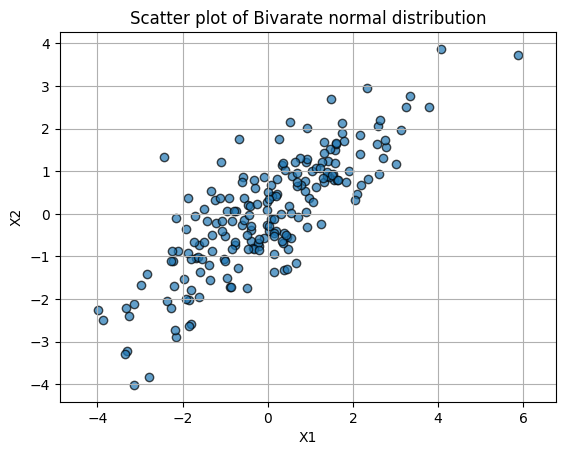

In [4]:
#Visualize the relationship between two features
#Scatter plot of the two features
plt.figure()
plt.scatter(X[:, 0], X[:, 1] , edgecolor='k', alpha=0.7)
plt.title("Scatter plot of Bivarate normal distribution")
plt.xlabel("X1")
plt.ylabel("X2")
plt.axis('equal')
plt.grid(True)
plt.show()

## Perform PCA on the dataset

In [5]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [6]:
#get the principal components from the model
components = pca.components_
components

array([[ 0.78215821,  0.62307987],
       [-0.62307987,  0.78215821]])

In [7]:
pca.explained_variance_ratio_

array([0.9111946, 0.0888054])

first principal component explain over 90% of variance in the data while the second component explains 9%

In [8]:
#The projection of data onto a given principal component yelds the coordinates of 
# each of the data points
projection_pc1 = np.dot(X, components[0])
projection_pc2 = np.dot(X, components[1])

In [9]:
x_pc1 = projection_pc1 * components[0][0]
y_pc1 = projection_pc1 * components[0][1]
x_pc2 = projection_pc2 * components[1][0]
y_pc2 = projection_pc2 * components[1][1]


## Plot the result

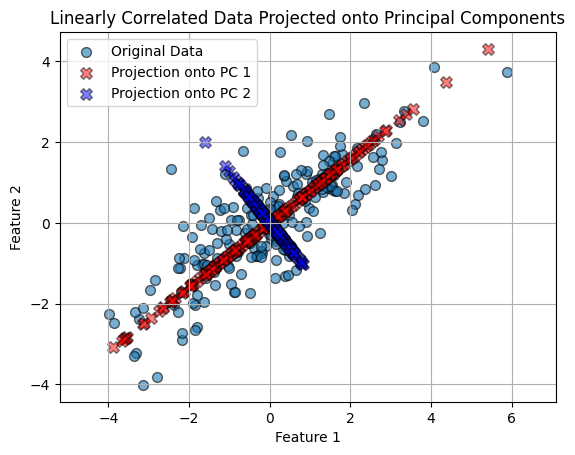

In [10]:
# Plot original data
plt.figure()
plt.scatter(X[:,0], X[:,1], label='Original Data', ec='k', s=50, alpha=0.6)

# Plot the projection along PC1 and PC2
plt.scatter(x_pc1, y_pc1, c='r', ec='k', marker='X', s=70, alpha=0.5, label='Projection onto PC 1')
plt.scatter(x_pc2, y_pc2, c='b', ec='k', marker='X', s=70, alpha=0.5, label='Projection onto PC 2')
plt.title('Linearly Correlated Data Projected onto Principal Components',)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

- The first direction, in red, is aligned in the direction having the widest variation.
- The second direction, in blue, is perpendicular to first and has a lower variance.

## PCA for feature space dimensionality reduction

In [11]:
# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [13]:
# Apply PCA and reduce the dataset to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [14]:
X_pca

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538],
       [-2.07563095,  1.48917752],
       [-2.44402884,  0.0476442 ],
       [-2.23284716,  0.22314807],
       [-2.33464048, -1.11532768],
       [-2.18432817, -0.46901356],
       [-2.1663101 ,  1.04369065],
       [-2.32613087,  0.13307834],
       [-2.2184509 , -0.72867617],
       [-2.6331007 , -0.96150673],
       [-2.1987406 ,  1.86005711],
       [-2.26221453,  2.68628449],
       [-2.2075877 ,  1.48360936],
       [-2.19034951,  0.48883832],
       [-1.898572  ,  1.40501879],
       [-2.34336905,  1.12784938],
       [-1.914323  ,  0.40885571],
       [-2.20701284,  0.92412143],
       [-2.7743447 ,  0.45834367],
       [-1.81866953,  0.08555853],
       [-2.22716331,  0.13725446],
       [-1.95184633, -0.62561859],
       [-2.05115137,  0.24216355],
       [-2.16857717,  0.52714953],
       [-2.13956345,

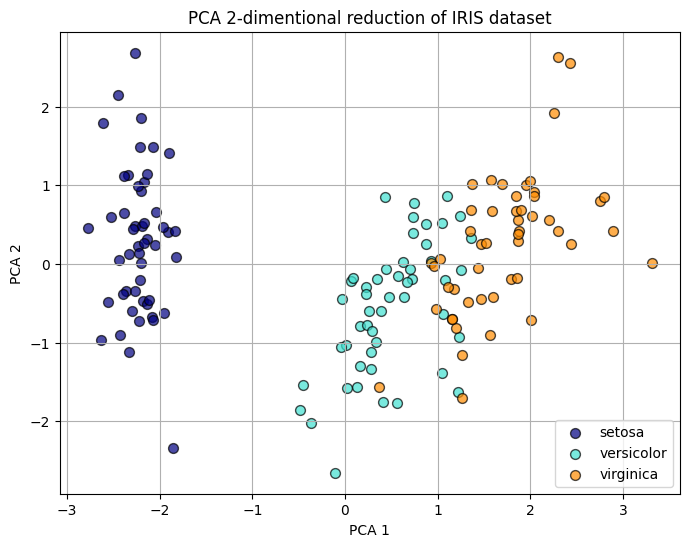

In [15]:
# Plot the PCA transformed data in 2D
plt.figure(figsize=(8, 6))
colors = ['navy', 'turquoise', 'darkorange']
lw = 1

for color, i , target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_pca[y==i, 0],X_pca[y==i, 1],color=color, s=50, ec='k', alpha = 0.7, lw = lw,
                label=target_name) 

plt.title('PCA 2-dimentional reduction of IRIS dataset',)
plt.xlabel("PCA 1",)
plt.ylabel("PCA 2",)
plt.legend(loc='best', shadow=False, scatterpoints=1,)
plt.grid(True)
plt.show()

In [16]:
100*pca.explained_variance_ratio_.sum()

np.float64(95.81320720000164)

The two combined principal components can explain 95% of the original feature space variance.

-----------------------------------------------

## Reinitialize the PCA model without reducing the dimension

In [17]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

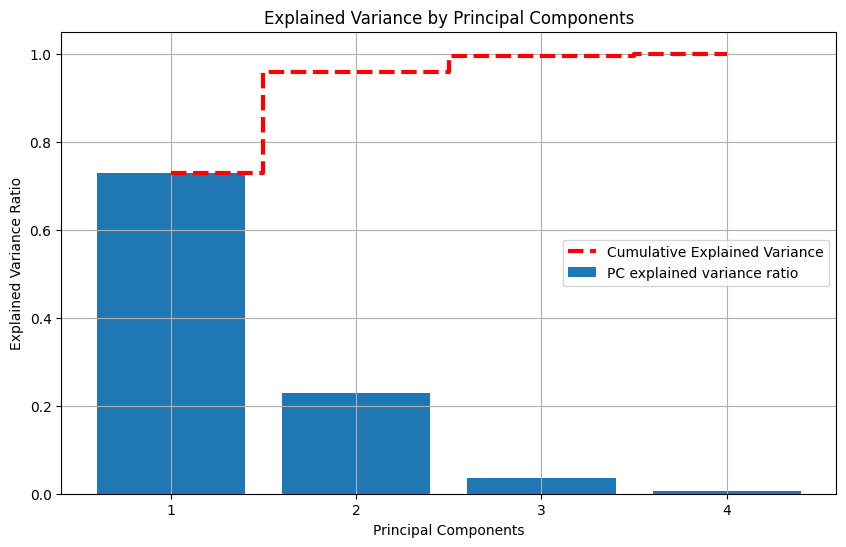

In [18]:
# Explained variance ration
explained_variance_ratio = pca.explained_variance_ratio_

# Plot explained variance ratio for each component
plt.figure(figsize=(10, 6))
plt.bar(x=range(1, len(explained_variance_ratio)+1), height = explained_variance_ratio, alpha = 1, align='center', label='PC explained variance ratio')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.title('Explained Variance by Principal Components')

# Plot cumulative explained variance
cumulative_variance = np.cumsum(explained_variance_ratio)
plt.step(range(1,5), cumulative_variance, where='mid', linestyle='--', lw=3, color='red', label='Cumulative Explained Variance')

# Only display integer ticks on the x-axis
plt.xticks(range(1,5))
plt.legend()
plt.grid(True)
plt.show()
